##### The Project seeks to develop a model that predicts the premium on health insurance.
##### Souce: Kaggle
##### age  - the persons age
##### sex -   male or female
##### bmi  -  persons body mass index
##### children - how many children the person has
##### smoker - if the person smokes or not
##### region - the persons location
##### charges (premium payable)

In [1]:
# To bring in the libraries
import pandas as pd
import numpy as np

In [2]:
# To bring in the dataset
df = pd.read_csv(r"C:\Users\user\Desktop\data source\Health_insurance.csv")

In [3]:
# To view the top end of the dataset
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# To check for number of rows and columns
print(('There are {} rows and {} columns').format(df.shape[0], df.shape[1]))

There are 1338 rows and 7 columns


In [5]:
# To check the general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# To check for missing values in absolute terms in the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# To get the categorial columns
cat_col = [col for col in df.columns if df[col].dtypes == 'O']
print(cat_col)

['sex', 'smoker', 'region']


In [8]:
# To get the numerical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
print(num_col)

['age', 'bmi', 'children', 'charges']


In [9]:
# To get the number of unique values in each column
for col in df.columns:
    values = df[col].nunique()
    print(f'{col}:{values}')

age:47
sex:2
bmi:548
children:6
smoker:2
region:4
charges:1337


In [10]:
# To obatin the unique values contained in the different columns in the dataset
for col in df.columns:
    values = df[col].unique()
    print(f'{col}:{values}')

age:[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex:['female' 'male']
bmi:[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34

In [11]:
# To check for duplicates 
df.duplicated().sum()

1

In [12]:
# To get a sample of the dataset in a bid to have a sense of the cleaning work required
df.sample(10).T

,405,222,933,1021,1213,825,720,420,335,388
age,52,32,45,22,52,64,51,64,64,26
sex,female,male,female,female,female,female,female,male,male,female
bmi,38.38,30.8,35.3,31.02,33.3,31.825,40.66,33.88,34.5,22.61
children,2,3,0,3,2,2,0,0,0,0
smoker,no,no,no,yes,no,no,no,yes,no,no
region,northeast,southwest,southwest,southeast,southwest,northeast,northeast,southeast,southwest,northwest
charges,11396.9002,5253.524,7348.142,35595.5898,10806.839,16069.08475,9875.6804,46889.2612,13822.803,3176.8159


#####  After review of the dataset, every other thing seems ok except for the duplicated item. To be addressed next

In [13]:
# To find the duplicates in the dataset and have them displayed across the columns
duplicated_rows = df[df.duplicated()]
duplicated_rows

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
# To get rid of the duplicates in the dataset
df = df.drop_duplicates()

In [15]:
# To check operation and confirm that all duplicates have been eliminated
df.duplicated().sum()

0

###### This section deals with Exploratory Data Analysis (EDA)
###### Univariate Analysis will be done for the features in the dataset

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

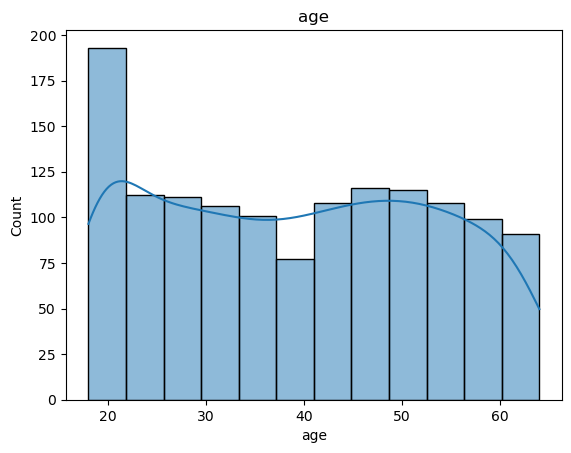

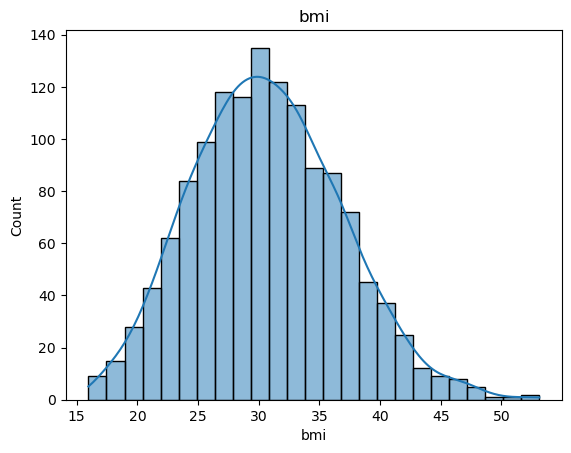

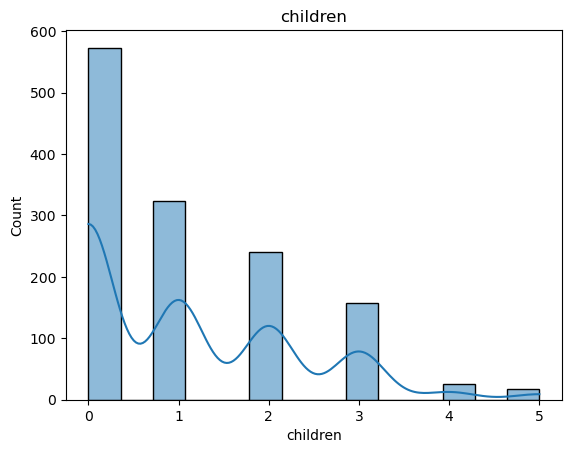

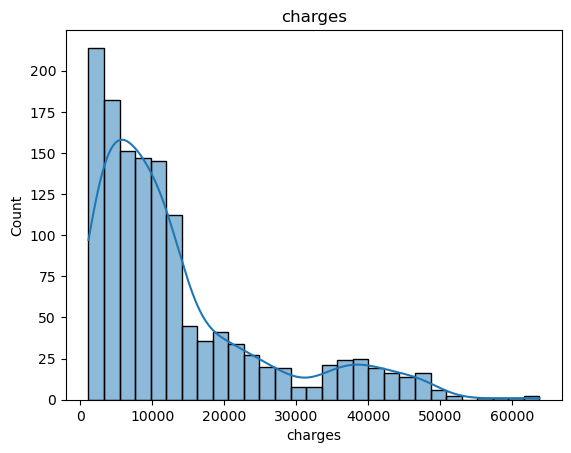

In [17]:
numeric_features = [numeric for numeric in df.columns if df[numeric].dtypes!='O']
for features in numeric_features:
        sns.histplot(df[features], kde = True)
        plt.title(features)
        plt.show()

In [18]:
# For the categorical colunms, a univairate analysis is also done
# Countplot is adopted to better undersand the varibales

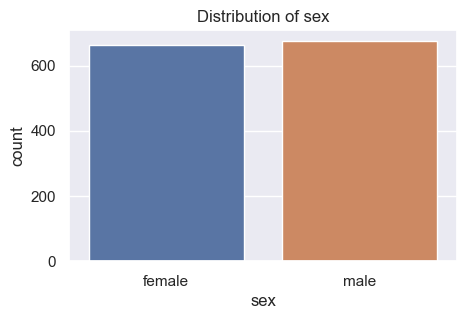

In [19]:
# For sex
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='sex', data = df)
plt.title('Distribution of sex')
plt.show()

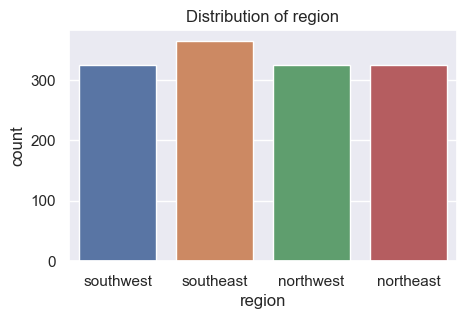

In [20]:
# For region
sns.set(rc = {'figure.figsize':(5,3)})
sns.countplot(x ='region', data = df)
plt.title('Distribution of region')
plt.show()

##### This section deals with Bivariate Analysis looking at the relationship between the input numerical variables and the target variable. A Person-r correlation and a Scatterplot are adopted.

In [21]:
# To bring in the stat library
from scipy import stats
import statistics as stat

In [22]:
# To create a DataFrame for the correlation value and p-value as well as the target variable and other features that are numerical.
corr_df = pd.DataFrame(columns = ['correlation(r)', 'p-value(p)'])
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col!= 'charges':
        r, p = stats.pearsonr(df['charges'], df[col])
        r = round(r,3)
        p = round(p,3)
        corr_df.loc[col] = [r, p]
    corr_df 

In [23]:
corr_df

,correlation(r),p-value(p)
age,0.298,0.000
bmi,0.198,0.000
children,0.067,0.014


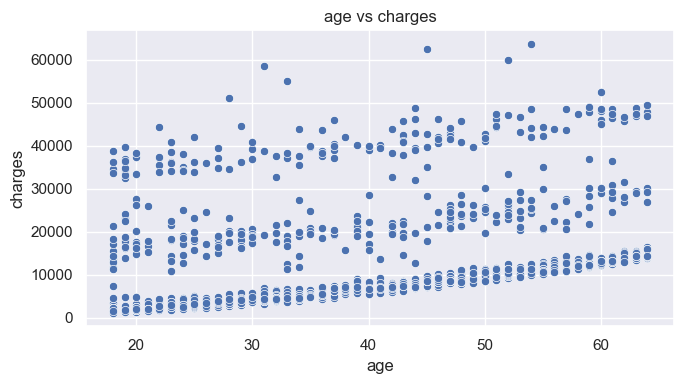

In [24]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'age', y = 'charges')
plt.title('age vs charges')
plt.tight_layout()
plt.show()

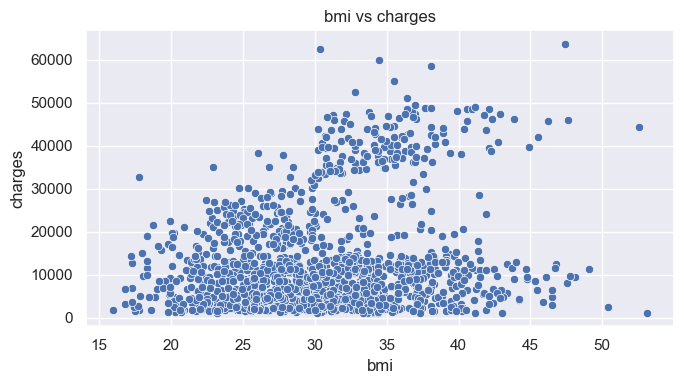

In [25]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'bmi', y = 'charges')
plt.title('bmi vs charges')
plt.tight_layout()
plt.show()

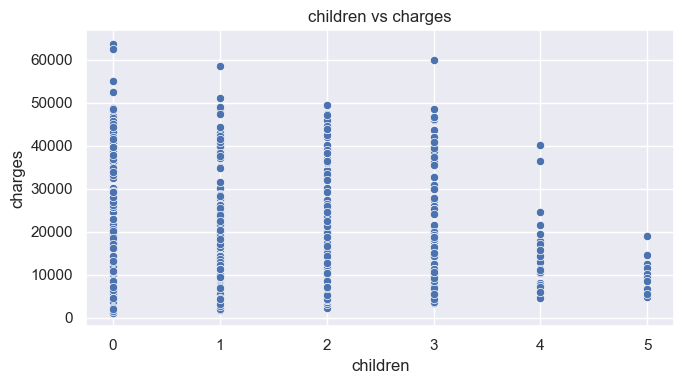

In [26]:
plt.figure(figsize = (7,4))
sns.scatterplot(data = df, x = 'children', y = 'charges')
plt.title('children vs charges')
plt.tight_layout()
plt.show()

##### This section equally delas with Bivariate Analysis, however, the relationship is between categorical features and the target. The statistical tools employed are t-test and one way ANOVA. Barchart shall be used for illustration¶

In [27]:
# Bring the library
# For features with 2 unique values, t- test is applied, while features with more than 2 unique values, one way ANOVA is applied
from scipy import stats
import statistics as stat

In [28]:
# Separate data into two groups based on 'sex'
yes_m = df[df['sex'] == 'male']
yes_f = df[df['sex'] == 'female']

In [29]:
# Applying the t-test
stats.ttest_ind(yes_m['charges'], yes_f['charges'])

TtestResult(statistic=2.124391307062026, pvalue=0.0338207919951195, df=1335.0)

In [30]:
# Separate data into two groups based on 'smoker'
y_smoker = df[df['smoker'] == 'yes']
n_smoker = df[df['smoker'] == 'no']

In [31]:
# Applying the t-test
stats.ttest_ind(y_smoker['charges'], n_smoker['charges'])

TtestResult(statistic=46.64479459840305, pvalue=1.4067220949376498e-282, df=1335.0)

In [32]:
# Features with more than 2 groups. One way ANOVA is adopted to test the target variable 
from scipy.stats import f_oneway

In [33]:
group = df['region'].unique()
group

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [34]:
for i in group:
    yes_no_grouping = df[df['region']==i]
    print(yes_no_grouping)

      age     sex   bmi  children smoker     region      charges
0      19  female  27.9         0    yes  southwest  16884.92400
12     23    male  34.4         0     no  southwest   1826.84300
15     19    male  24.6         1     no  southwest   1837.23700
18     56    male  40.3         0     no  southwest  10602.38500
19     30    male  35.3         0    yes  southwest  36837.46700
...   ...     ...   ...       ...    ...        ...          ...
1316   19  female  20.6         0     no  southwest   1731.67700
1329   52    male  38.6         2     no  southwest  10325.20600
1331   23  female  33.4         0     no  southwest  10795.93733
1332   52  female  44.7         3     no  southwest  11411.68500
1336   21  female  25.8         0     no  southwest   2007.94500

[325 rows x 7 columns]
      age     sex    bmi  children smoker     region     charges
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
5

In [35]:
def anova(feature, label):
    group = df[feature].unique()
    grouped_list = []
    
    for i in group:
        yes_no_grouping = df[df[feature]==i][label]
        grouped_list.append(yes_no_grouping)
    return stats.f_oneway(* grouped_list)

In [36]:
anova('region', 'charges')

F_onewayResult(statistic=2.926139903662776, pvalue=0.03276288025444947)

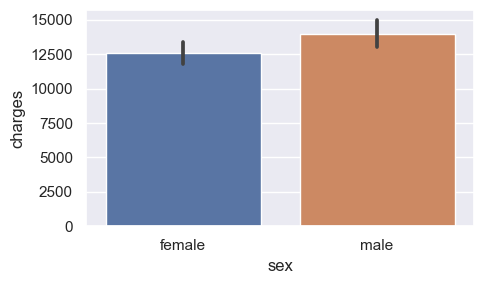

In [37]:
# create a subplot 2 by 2 grid
# categorical features plotted aganist the target variable 

sns.barplot(data = df, x ='sex', y = 'charges')
plt.tight_layout()
plt.show()

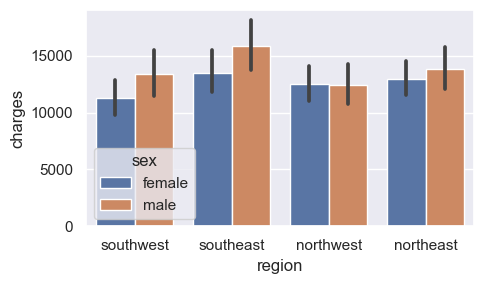

In [38]:
sns.barplot(data = df, x ='region', y = 'charges', hue = 'sex')
plt.tight_layout()
plt.show()

##### This Section deals with Multivariate Analysis. The Pairplot and Heatmap will be looked at.

In [39]:
# To call up all numerical variables in the dataset
my_df = df.select_dtypes(include = np.number)

In [40]:
my_df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


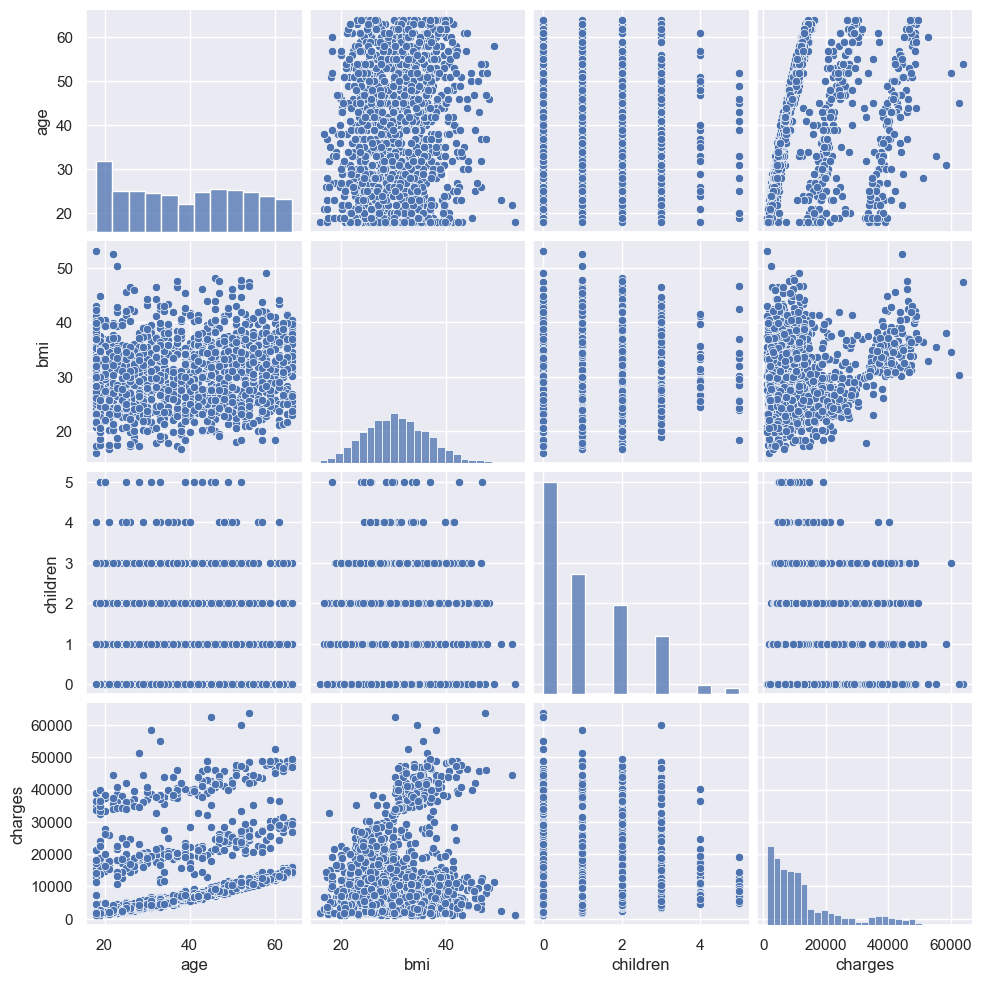

In [41]:
# Pairplot
sns.pairplot(data = my_df)

<Axes: >

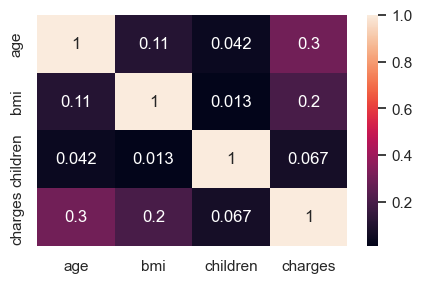

In [42]:
sns.heatmap(my_df.corr(), annot = True, cbar = True)

###### This section deals with data preprocessing for Machine learning¶

In [43]:
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_4108\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


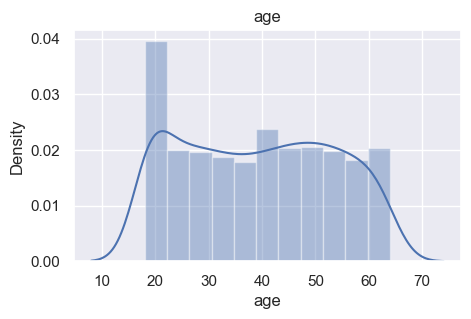

C:\Users\user\AppData\Local\Temp\ipykernel_4108\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


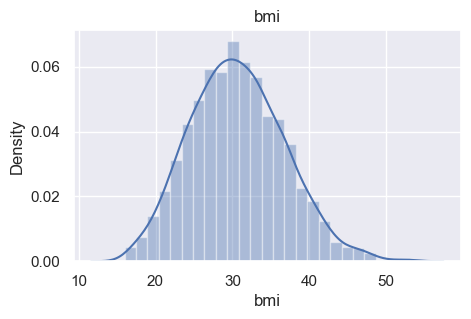

C:\Users\user\AppData\Local\Temp\ipykernel_4108\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


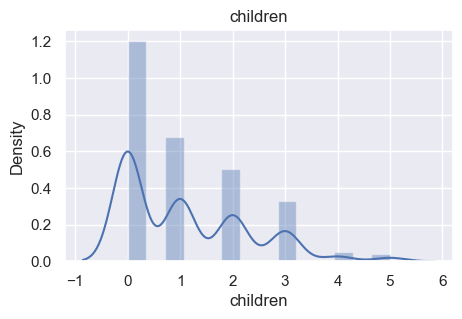

C:\Users\user\AppData\Local\Temp\ipykernel_4108\3955740922.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])


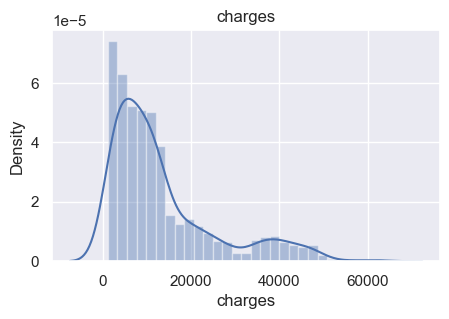

In [44]:
num_features = [num for num in df.columns if df[num].dtypes!='O']
for features in num_features:
        sns.distplot(df[features])
        plt.title(features)
        plt.show()

In [45]:
for features in num_features:
    skew = df[features].skew()
    skew = round(skew, 2)
    print(features,skew)

age 0.05
bmi 0.28
children 0.94
charges 1.52


In [46]:
# To split the DataFrame before the encoding.

x = df.drop('charges', axis = 1)
y = df[['charges']]

In [47]:
# To confirm the operation(split)
x.head(2)

,age,sex,bmi,children,smoker,region
0,19,female,27.90,0,yes,southwest
1,18,male,33.77,1,no,southeast


In [48]:
# To confirm the operation (split)
y.head(2)

,charges
0,16884.9240
1,1725.5523


In [49]:
# To encode
x = pd.get_dummies(x,dtype = int)

In [50]:
# To confirm operation
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [51]:
# Normalization otherwise known as scaling is done on x
# Bring in the library
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler ()
scaled_features = [feature for feature in x.columns]
scaled_data = scaler.fit_transform(x)
x = pd.DataFrame(data = scaled_data, columns = scaled_features)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1333,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,0.000000,0.562012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1335,0.065217,0.264730,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


###### This is the Machine Learning section

In [53]:
# Next is to split the dataset into Train and Test set
# Bring in the library
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
# The display of the train_split
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1113,0.108696,0.230024,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
967,0.065217,0.263250,0.4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
598,0.739130,0.580172,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0.686306,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
275,0.630435,0.286252,0.4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1095,0.717391,0.511165,0.4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1130,0.195652,0.805488,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1294,0.043478,0.162497,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
860,0.434783,0.323917,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
# The display of the train_split
y_train

,charges
1114,2396.09590
968,3279.86855
599,33471.97189
170,13405.39030
275,9715.84100
...,...
1096,44641.19740
1131,3693.42800
1295,1964.78000
861,7151.09200


In [57]:
# Next, is to do cross validation -(Hyperparameter tuning)
# This is to select the best fit regression model for the task
# Bring in the libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [58]:
models = [('RandomForest', RandomForestRegressor()),
          ('LinearRegression', LinearRegression()),
          ('DecisionTree', DecisionTreeRegressor())]

results = []
random_seed = 42
np.random.seed(random_seed)

In [59]:
for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=random_seed)
    cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append((name, -cv_scores.mean(), cv_scores.std()))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

In [60]:
# Print the results
for result in results:
    print(f"{result[0]}: Mean MAE = {result[1]}, Std = {result[2]}")

RandomForest: Mean MAE = 2740.0456385822845, Std = 142.93015545635706
LinearRegression: Mean MAE = 4220.559453453922, Std = 208.1499136947534
DecisionTree: Mean MAE = 3274.9088394682117, Std = 190.00185330436867


In [61]:
# Next is to train and test the data
model = RandomForestRegressor()
model.fit(x_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [62]:
# on seen data
model.score(x_train,y_train)

0.9746973458096454

In [63]:
# on unseen data
model.score(x_test,y_test)

0.8832327284311966

In [64]:
y_test

,charges
900,8688.85885
1064,5708.86700
1256,11436.73815
298,38746.35510
237,4463.20510
...,...
534,13831.11520
542,13887.20400
760,3925.75820
1284,47403.88000


In [65]:
# When x_test is predicted by the model to produce y_test
y_pred = model.predict(x_test)
print(y_pred)

[ 9573.0023091  6946.5017183 11968.0106695 43859.2979591  6646.0812703
 10463.967847  38141.1579686  2740.6041721  8655.0501363 11073.7456934
 13758.9972878 23762.0963791 43181.11244   14672.8195298  7276.1771103
  9029.107015   6262.9508603 39446.699897   5660.9558741  5099.9110335
  4598.8784665 21214.501562  10653.4197842 20597.8133086 38599.9200366
 18666.9528861 42908.2768792 45729.3998095 10755.9938842 14306.238084
  4180.3319802  9622.1336241  2907.6482191 15017.7369867 47371.6594041
  9780.7942975  7745.3429755  5888.251263  24186.317384   9009.2752015
  3250.1419006 21854.8311489 41517.9490847  9632.6781759  9551.2178917
  3406.6963657  3234.677059   7537.0003834  6594.8282499 11567.4584072
  4910.1464146  7788.1189302 22892.2826807  7208.4705872  7400.3001795
  9182.3178661 12095.3082417  6440.5892456 40794.170589   7207.1134205
 11276.1851384  5393.1379592 18838.4216294  1756.57104   13611.4019357
 15033.3870666  6630.0473476 22704.234873  16907.7370995 16827.1822937
 13383.

In [66]:
# Actual y_test transposed to match the apperance of the predicted outcome
horizontal_array = np.array([y_test]).flatten()
print(horizontal_array)

[ 8688.85885   5708.867    11436.73815  38746.3551    4463.2051
  9304.7019   38511.6283    2150.469     7345.7266   10264.4421
 13415.0381   24393.6224   37607.5277   13063.883    24915.04626
  8027.968     1980.07     38709.176     3484.331     3947.4131
  1880.07     20773.62775   9800.8882   21082.16     55135.40209
  3579.8287   43896.3763   52590.82939   9778.3472   10736.87075
  4347.02335   9048.0273    1711.0268   12333.828    63770.42801
  9872.701     4687.797     5693.4305   21195.818     8233.0975
  2755.02095  19798.05455  42124.5153    9964.06      9193.8385
  3161.454     2217.6012    7337.748     4133.64165   6338.0756
  4349.462     5757.41345  21771.3423    1391.5287    7160.094
  7731.4271    9957.7216    3594.17085  38282.7495    7256.7231
 10977.2063    5245.2269   11187.6567    1708.92575  11411.685
 11729.6795    6079.6715   37829.7242   16297.846    31620.00106
  9991.03765   2203.47185   6858.4796    3167.45585  10796.35025
  1728.897    12574.049     4889.999

###### In evaluating the result of the model score, the following are used:
###### R^2 Co-efficient of Determination
###### Mean Absolute Error (MAE)
###### Mean Squared Error (MSE)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8832327284311966

In [68]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2590.88379978097

In [69]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

21456694.232301485